In [114]:
import pandas
from pandas import DataFrame
import read_data
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [110]:
dataframe = read_data.create_frame()
dataframe

,object_name,seq_name,num_of_sequences,sequence_len,cycle,sequence_values,scenes
0,BRUMC1,BRUMC1,1,8,,"[B.27.23.B.30, A.38, G.27.30, B.24.11, B.27.28...",[1]
1,BRUMC2,BRUMC2,1,2,a,"[E.17.48.3, B.29.23.B.25]",[14]
2,BRUMC3,BRUMC3,1,2,a,"[B.29.35, B.24.5]",[13]
3,BRUMC4,BRUMC4,1,2,a,"[B.24.11, B.29.35]",[14]
4,COLA02,COLA02,1,8,,"[B.24.11, B.31.28, A.6, B.24.28.7, A.38, B.29....","[1, 5]"
...,...,...,...,...,...,...,...
250,MUNSA-0007688,MUNSA-0007688,1,8,0,"[B.24.10, B.27.25.B.30, A.36, B.24.28, B.24.11...",[9]
251,MUNSA-0007686,MUNSA-0007686,1,10,0,"[A.37, B.29.25, A.37, B.29.25, A.37, B.29.25, ...",[0]
252,HMV-63.54.12,HMV-63.54.12inf,1,16,0,"[E.31.47, B.29.25, A.19, B.31.25, E.31.47, B.2...",[0]
253,HMV-63.54.12,HMV-63.54.12cent,1,16,0,"[B.29.25, A.19, B.31.25, A.17, B.29.25, A.19, ...",[0]


In [111]:
sequences = dataframe['sequence_values']
sequences
symbols_dict = dict()
all_symbols_set = set()
for seq in sequences:
    for index, symbol in enumerate(seq):
        if index > 0:
            if symbol not in symbols_dict.keys():
                symbols_dict[symbol] = dict()
                all_symbols_set.add(symbol)
            if seq[index-1] not in symbols_dict[symbol].keys():
                symbols_dict[symbol][seq[index-1]] = 0
                all_symbols_set.add(seq[index-1])
            symbols_dict[symbol][seq[index-1]] += 1
for symbol in symbols_dict.keys():
    print(f'{symbol}: {max(symbols_dict[symbol].items(), key=lambda pair: pair[1])}')

print(len(all_symbols_set))

A.38: ('B.27.30', 5)
G.27.30: ('A.38', 1)
B.24.11: ('G.29.52', 8)
B.27.28.30.B.30: ('B.24.11', 1)
A.4: ('C.29', 2)
H.24.28: ('A.6', 6)
B.24.12: ('A.38', 4)
B.29.23.B.25: ('E.17.3', 9)
B.24.5: ('B.29.35', 2)
B.29.35: ('B.24.11', 4)
B.31.28: ('B.24.11', 5)
A.6: ('B.29.30', 8)
B.24.28.7: ('A.6', 1)
B.29.30.10: ('B.31.28.B.32', 2)
E.31.20: ('B.29.30.10', 1)
B.27.30: ('B.24.11', 12)
C.24.1: ('B.24.28', 6)
G.29.30.52: ('C.24.1', 2)
A.36: ('B.27.30', 10)
B.27.23: ('B.24.11', 2)
B.29.23: ('A.6', 3)
E.17: ('C.24.1', 5)
C.29: ('A.1.16', 2)
B.24.28: ('A.36', 3)
G.29.52: ('A.6', 8)
B.29.23.B.30: ('B.24.11', 2)
B.24.25: ('C.24.1', 3)
B.31.21: ('A.6', 4)
E.17.3: ('B.29.25', 2)
B.29.34: ('E.17.3', 1)
B.29.30: ('A.38', 6)
B.24.10.7: ('B.29.30', 1)
B.29.25: ('A.37', 5)
E.17.48.3: ('B.29.25', 1)
B.29.23.25.B.25: ('E.17.3', 1)
B.29.23.B.35: ('E.17.3', 2)
B.31.28.30: ('E.17.3', 2)
B.27.23.B.25: ('A.36', 1)
H.31.22: ('E.31.14.47', 1)
G.H.29.52: ('C.24.1', 1)
A.12: ('B.27.30', 2)
G.27: ('A.12', 1)
C.24: ('B

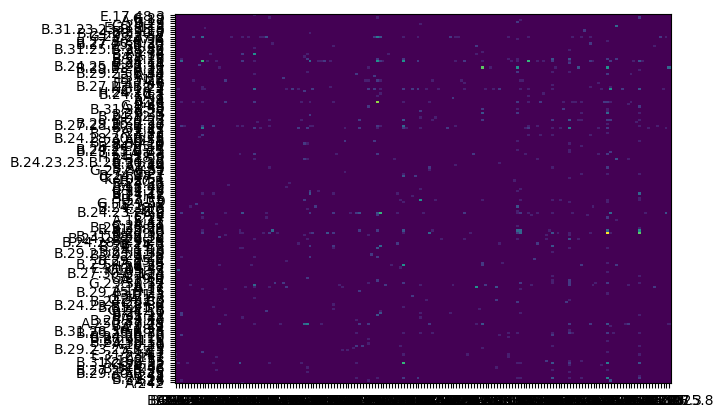

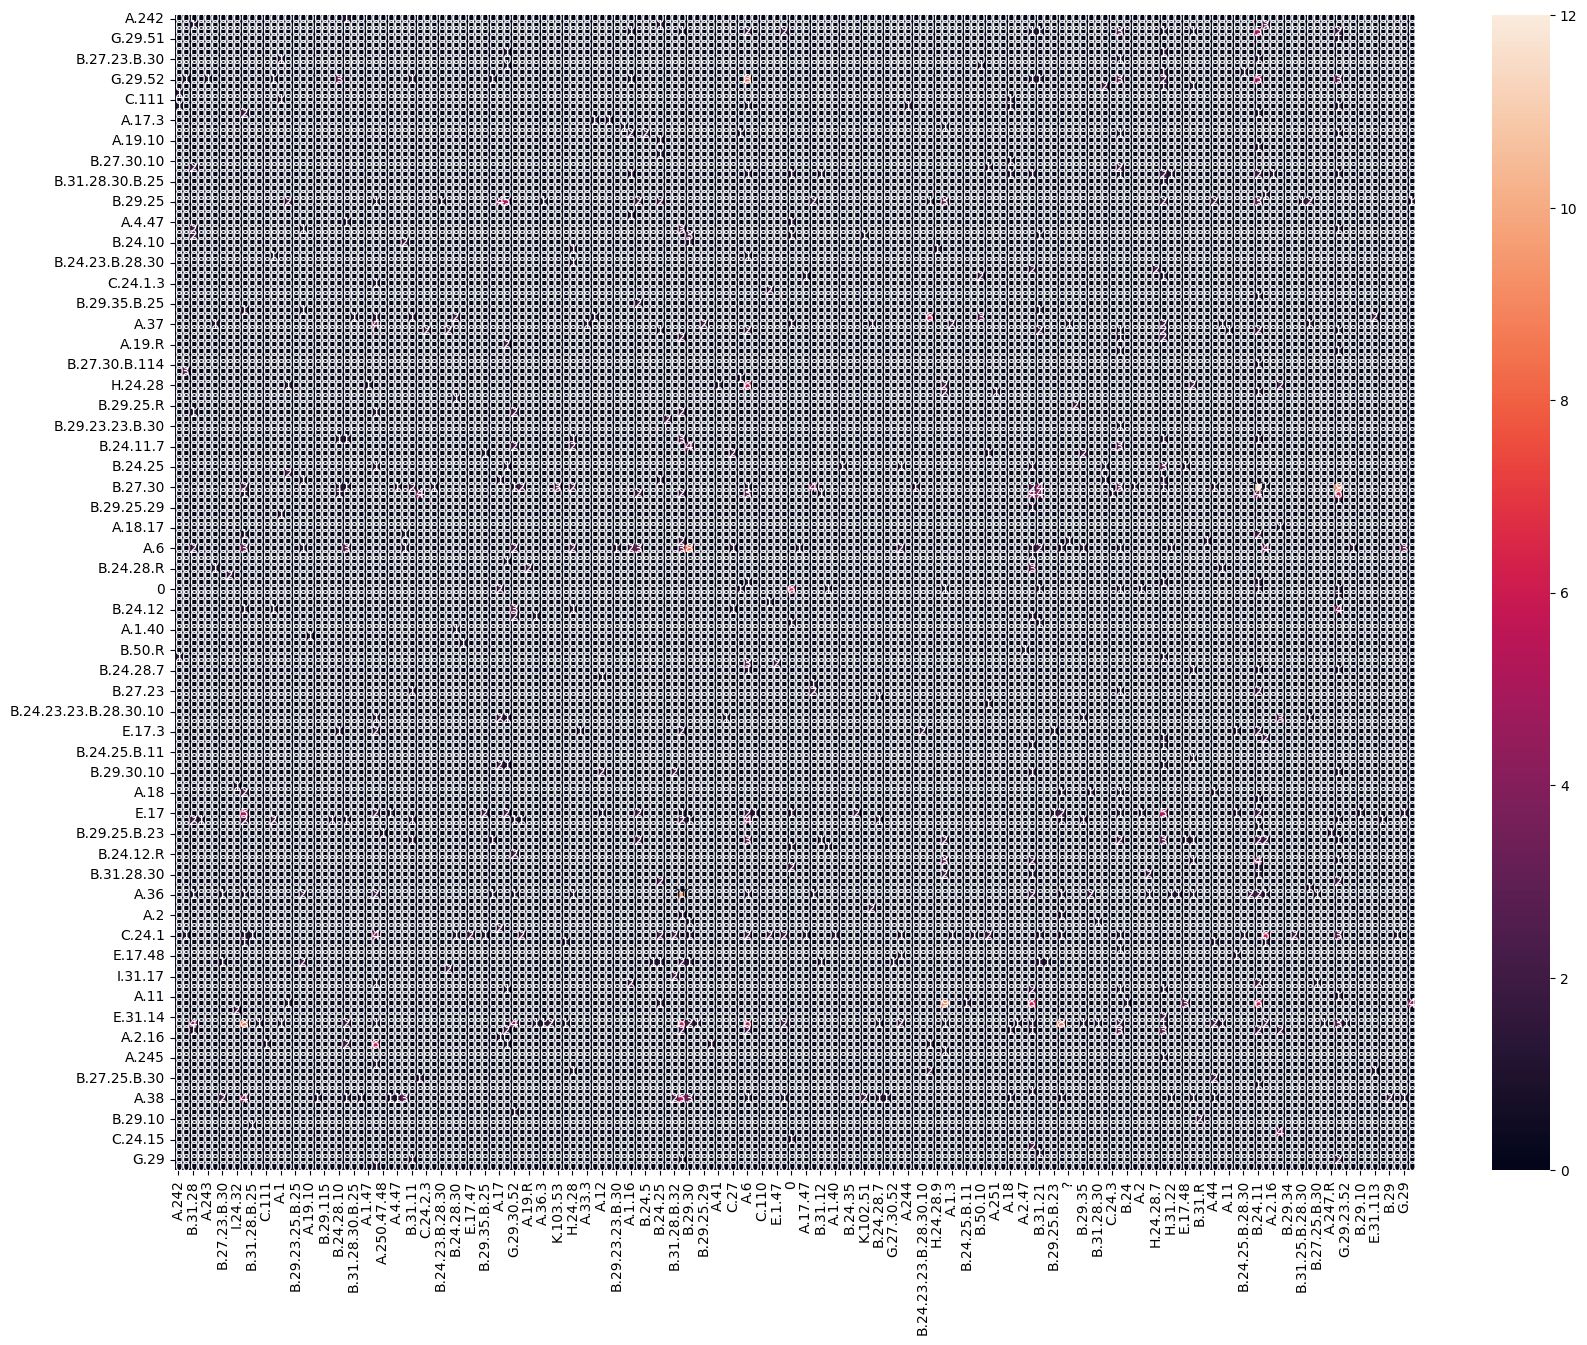

In [112]:

symbols_data = np.zeros(shape=(len(all_symbols_set), len(all_symbols_set)))
symbols_indexes = dict([(symbol, index) for index, symbol in enumerate(all_symbols_set)])
for symbol, values in symbols_dict.items():
    for symbol_, value in values.items():
        symbols_data[symbols_indexes[symbol]][symbols_indexes[symbol_]] = value
df = DataFrame(symbols_data, index=list(all_symbols_set), columns=list(all_symbols_set))

plt.pcolor(df)
plt.yticks(np.arange(0.5, len(df.index), 1), df.index)
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns)
plt.subplots(figsize=(20,15))
sns.heatmap(df, annot=True)
plt.show()
# piękne olek ozyj potrzebuje includa miec nowego musisz pobrac !!!!
# !~!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

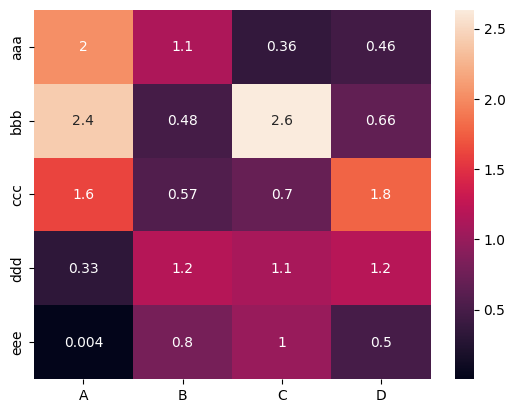

In [113]:
Index= ['aaa', 'bbb', 'ccc', 'ddd', 'eee']
Cols = ['A', 'B', 'C', 'D']
df = DataFrame(abs(np.random.randn(5, 4)), index=Index, columns=Cols)

sns.heatmap(df, annot=True)
plt.show()
